In [73]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress= True)


In [74]:
df_customers= pd.read_csv('customers.csv')
df_loans= pd.read_csv('loans.csv')
df_bureau= pd.read_csv('bureau_data.csv')

In [75]:
df_bureau.shape,df_customers.shape,df_loans.shape

((50000, 8), (50000, 12), (50000, 15))

In [76]:
df_customers.head(1)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001


In [77]:
df_loans.head(1)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False


In [78]:
df =pd.merge(df_customers,df_loans, on= 'cust_id')

In [79]:
df.head(1)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False


In [80]:
df = pd.merge(df, df_bureau)

In [81]:
df

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C49996,40,F,Single,Salaried,775000,2,Owned,11,Chennai,...,2024-07-22,2024-08-15,False,4,2,165,1,6,8,24
49996,C49997,39,M,Single,Salaried,3117000,0,Owned,9,Kolkata,...,2024-07-22,2024-07-29,False,4,0,161,0,0,4,91
49997,C49998,45,F,Single,Self-Employed,1329000,0,Rented,27,Bangalore,...,2024-07-22,2024-07-25,False,4,1,42,0,0,7,38
49998,C49999,42,F,Single,Self-Employed,533000,2,Mortgage,20,Hyderabad,...,2024-07-22,2024-07-29,False,1,2,42,9,47,4,17


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [83]:
df['default'] = df['default'].astype('int')
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [84]:
X = df.drop('default',axis= True)
y= df['default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
df_train= pd.concat([X_train,y_train], axis= 'columns')
df_test = pd.concat([X_test, y_test], axis= 'columns')
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0


In [85]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [86]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [87]:
#checking unique values for the residence type column
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [88]:
# checking the mode for the residence type 

mode_residence =df_train.residence_type.mode()[0]

In [89]:
# filling the mode values in the nan type in train df
df_train.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

C:\Users\saira\AppData\Local\Temp\ipykernel_11380\2252770646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [90]:
df_test_mode= df_test.residence_type.mode()[0]
df_test_mode

'Owned'

In [91]:
# filling the mode values in the nan type in train df
df_test.residence_type.fillna(df_test_mode, inplace=True)
df_test.residence_type.unique()

C:\Users\saira\AppData\Local\Temp\ipykernel_11380\655186474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(df_test_mode, inplace=True)


array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [92]:
#checking duplicates in train df 
df_train.duplicated().sum()

0

In [93]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [94]:
columns_continous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application',
                'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months',
                'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
columns_categorical = ['gender', 'loan_purpose', 'loan_type', 'default', 
                       'marital_status', 'employment_status', 'residence_type', 'state', 'zipcode']


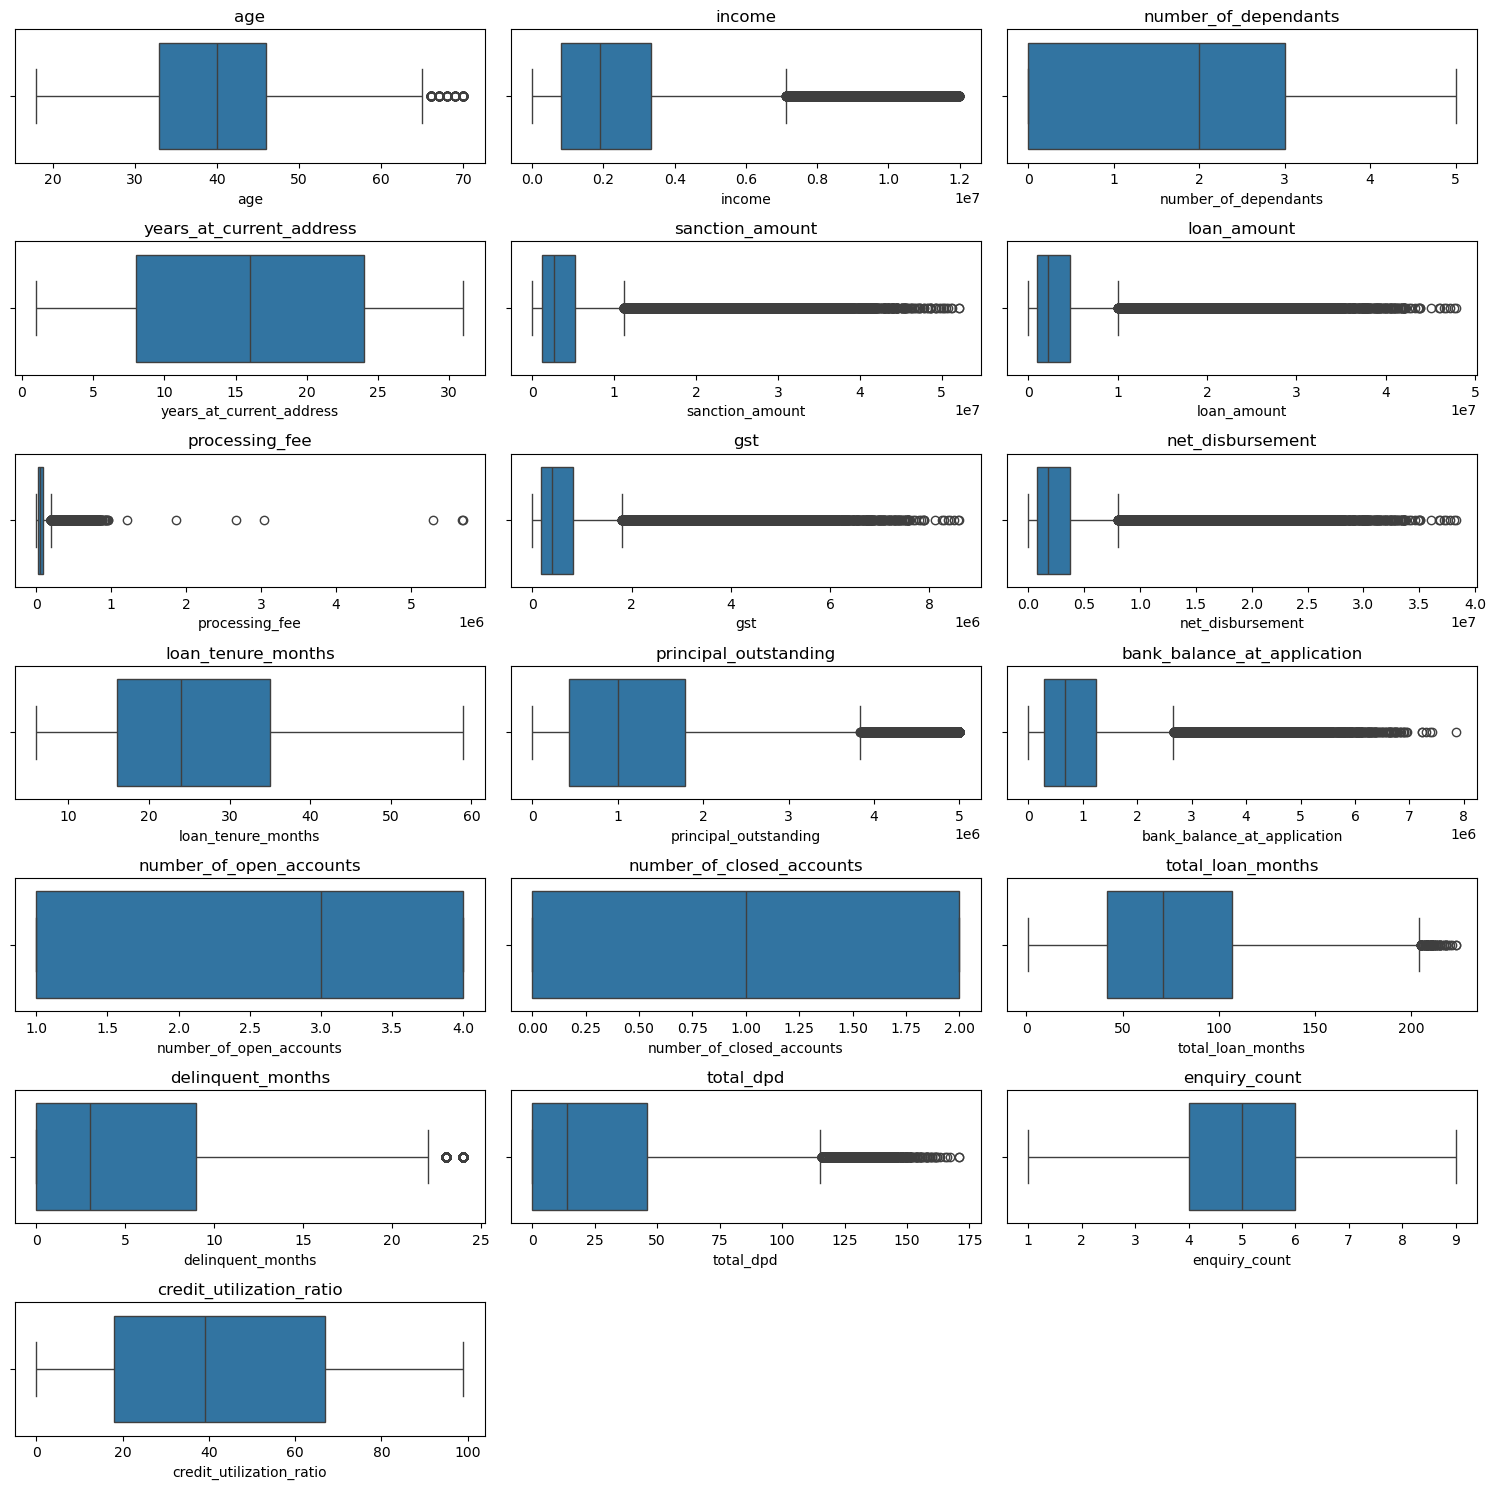

In [95]:
fig, axes = plt.subplots(nrows=(len(columns_continous) + 2) // 3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create boxplots for the continuous columns
for i, column in enumerate(columns_continous):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'{column}')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()    

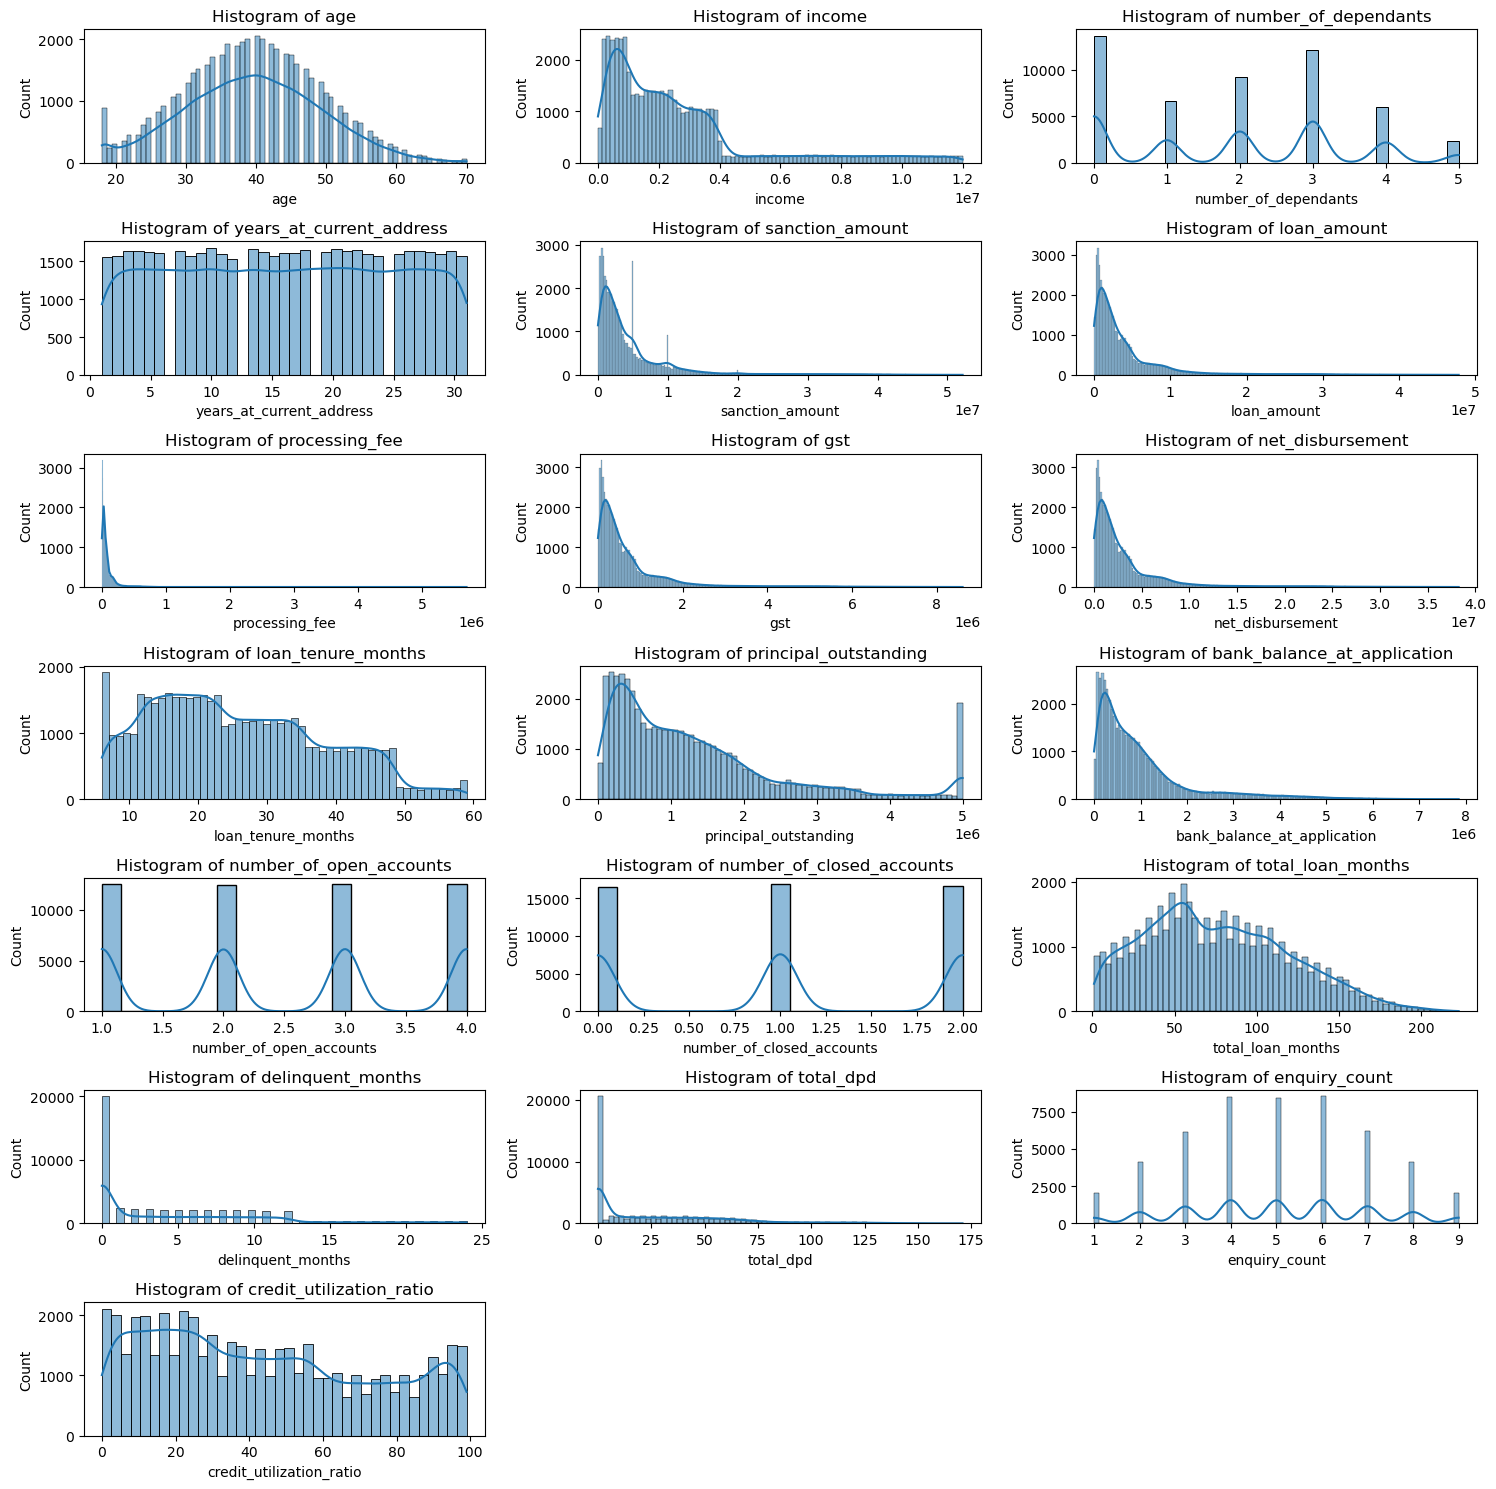

In [96]:
# Create 3 columns in a row
fig, axes = plt.subplots(nrows=(len(columns_continous) + 2) // 3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create histograms for the continuous columns
for i, column in enumerate(columns_continous):
    sns.histplot(df[column], ax=axes[i], kde=True)  # Using histplot for continuous data
    axes[i].set_title(f'Histogram of {column}')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()  

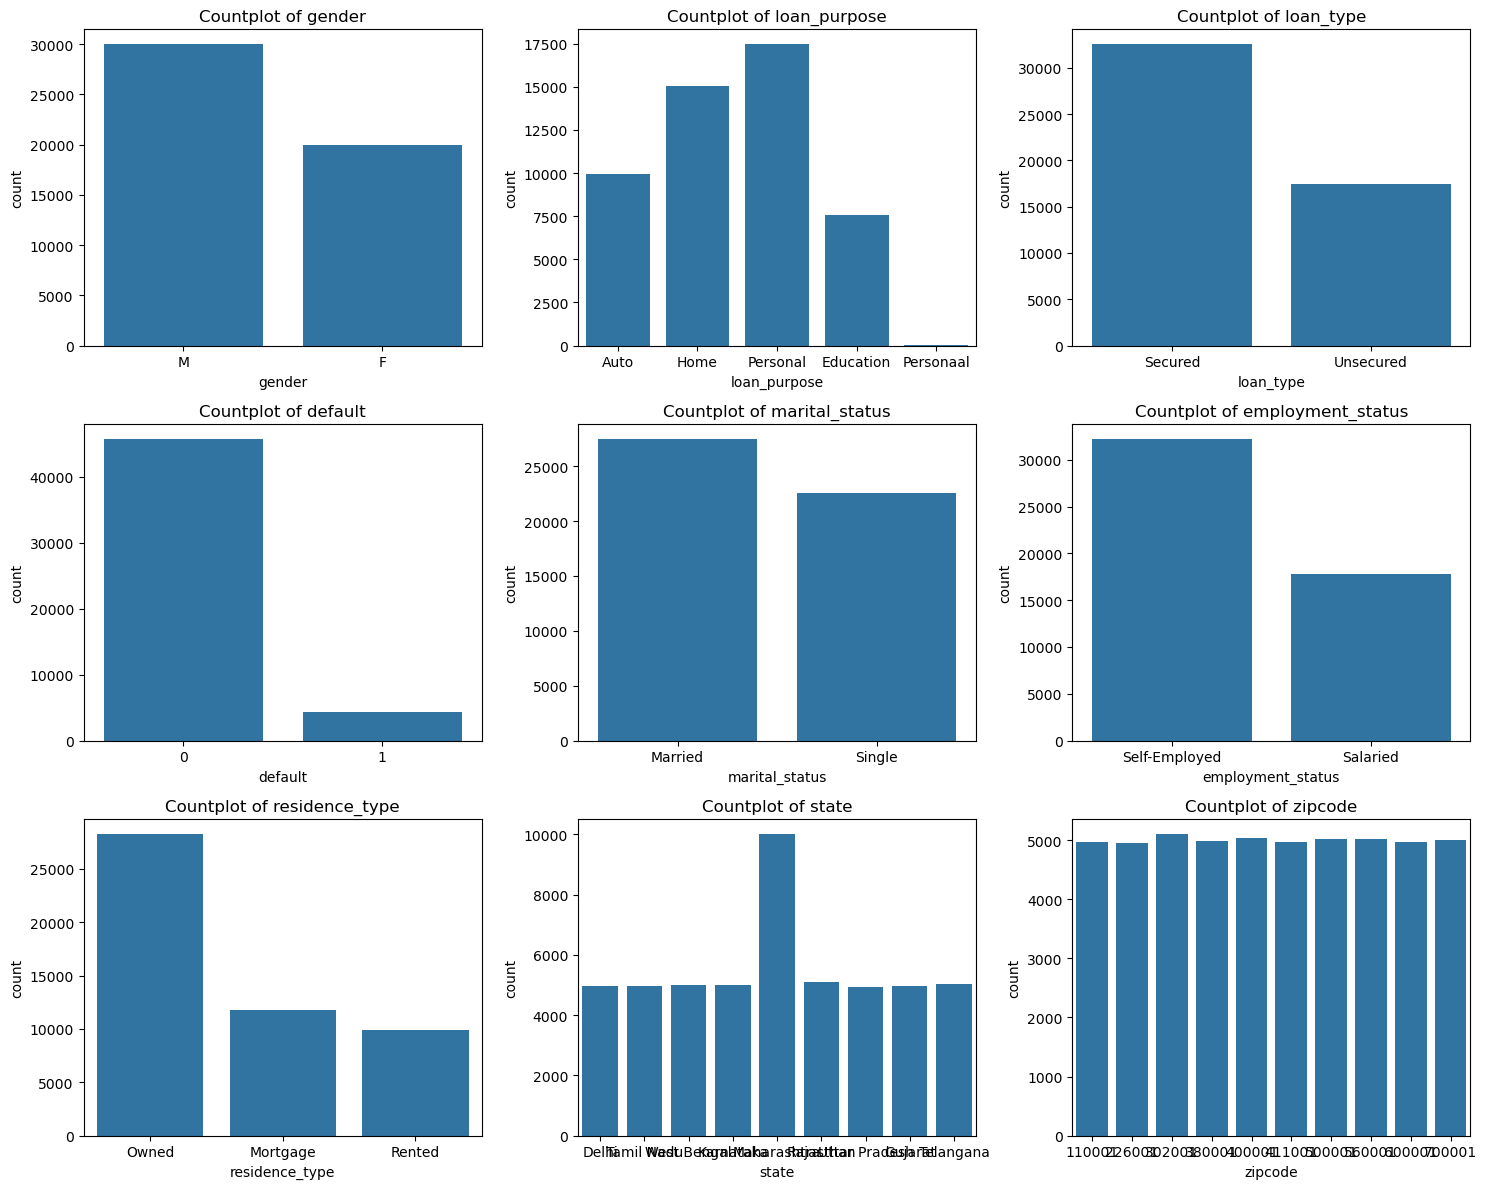

In [97]:
# Create 3 columns in a row
fig, axes = plt.subplots(nrows=(len(columns_categorical) + 2) // 3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create bar plots for the categorical columns
for i, column in enumerate(columns_categorical):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Countplot of {column}')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [98]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [99]:
#checking the outliers for loan amount with processing fee
df_train[df_train.processing_fee > df_train.loan_amount][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [100]:
df_train[(df_train.processing_fee / df_train.loan_amount) >0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [101]:
# creating a new data frame with processing fee with <3% on train df
df_train_1 =df_train[(df_train.processing_fee / df_train.loan_amount) <0.03].copy()
df_train_1

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,C11285,33,F,Single,Salaried,3506000,0,Rented,31,Hyderabad,...,2020-09-08,2020-09-17,4,1,129,23,126,7,93,1
44732,C44733,33,F,Single,Salaried,3889000,0,Owned,26,Delhi,...,2024-01-12,2024-01-21,3,0,80,0,0,3,23,0
38158,C38159,35,M,Married,Self-Employed,2420000,3,Rented,5,Kolkata,...,2023-05-17,2023-06-14,1,2,8,0,0,2,53,0
860,C00861,42,F,Married,Salaried,2133000,4,Owned,6,Mumbai,...,2019-08-25,2019-09-12,3,1,130,5,24,7,17,0


In [102]:
df_train_1[(df_train_1.processing_fee / df_train_1.loan_amount) >0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [103]:
## creating a new data frame with processing fee with <3% on test df
df_test =df_test[(df_test.processing_fee / df_test.loan_amount) <0.03].copy()
df_test.shape

(12498, 33)

In [104]:
df_test[(df_test.processing_fee / df_test.loan_amount) >0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [105]:
columns_categorical

['gender',
 'loan_purpose',
 'loan_type',
 'default',
 'marital_status',
 'employment_status',
 'residence_type',
 'state',
 'zipcode']

In [106]:
for col in columns_categorical:
    print(col, df_train_1[col].unique())

gender ['F' 'M']
loan_purpose ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type ['Secured' 'Unsecured']
default [0 1]
marital_status ['Single' 'Married']
employment_status ['Salaried' 'Self-Employed']
residence_type ['Owned' 'Mortgage' 'Rented']
state ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]


In [107]:
# changing misspelled columns name in df_train_1 and test df 

df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_train_1['loan_purpose'].unique()
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

<h3 align = 'center' style = 'color:blue' >Exploratory Data Analysis</h3>

<Axes: xlabel='age', ylabel='Count'>

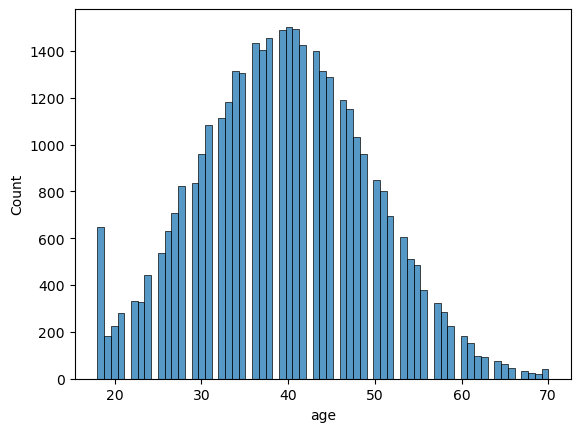

In [108]:
sns.histplot(df_train_1.age)

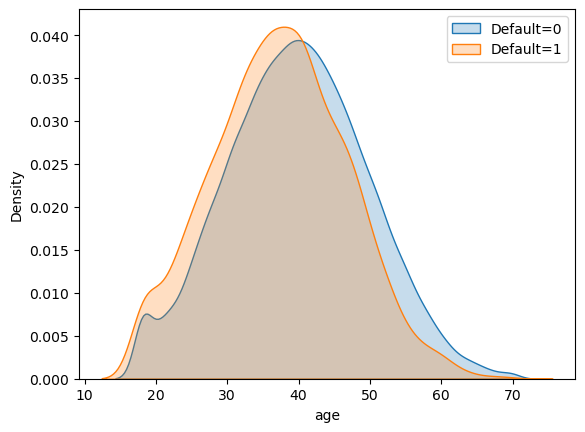

In [109]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'], fill= True,label='Default=0' )
sns.kdeplot(df_train_1[df_train_1.default==1]['age'], fill= True,label='Default=1')
plt.legend()
plt.show()

Insights:
1. The orange graph is a little bit shifted to the left of the blue graph, which indicates that people of a young age are more likely to default

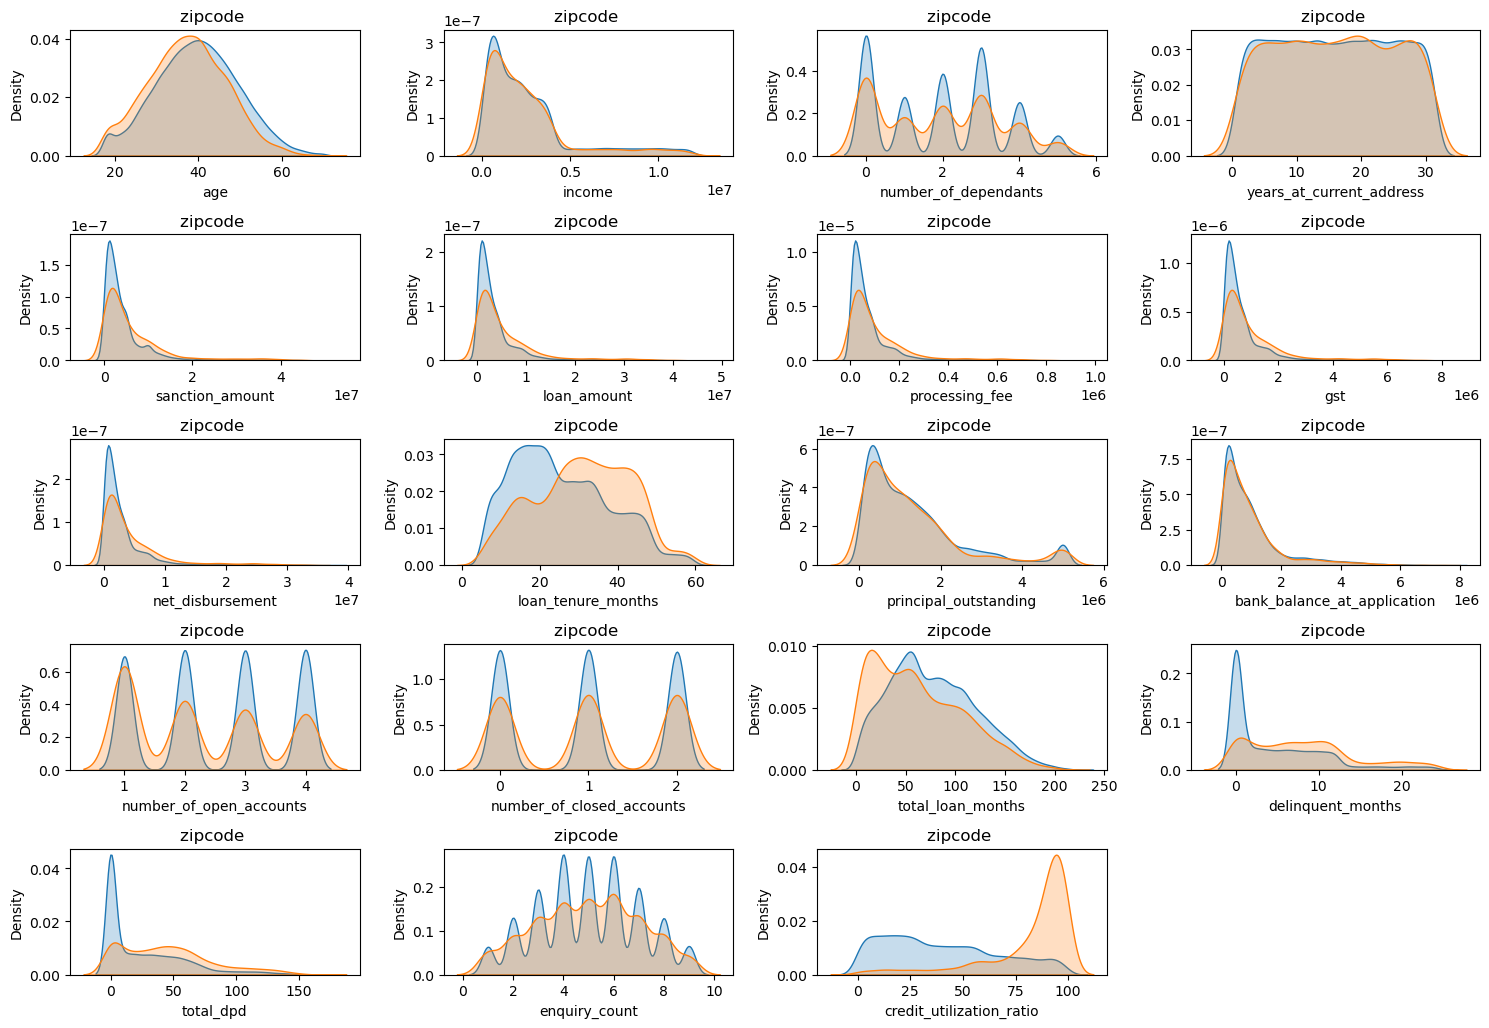

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a figure for the plots
plt.figure(figsize=(15, 12))

# Loop through each categorical column
for i, col in enumerate(columns_continous):
    plt.subplot(6,4, i+1)
    sns.kdeplot(data=df_train_1[col][df_train_1['default']==0], fill=True) 
    sns.kdeplot(data=df_train_1[col][df_train_1['default']==1], fill=True)# KDE plot for categorical columns
    plt.title(f'{column} ')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



<h3 align = 'center' style = 'color:blue' >Feature Engineering</h3>

In [111]:
df_train_1['loan_to_income']= round(df_train_1['loan_amount']/df_train_1['income'],2)
df_test['loan_to_income']= round(df_test['loan_amount']/df_test['income'],2)

In [112]:
df_train_1['loan_to_income'].iloc[1]


1.08

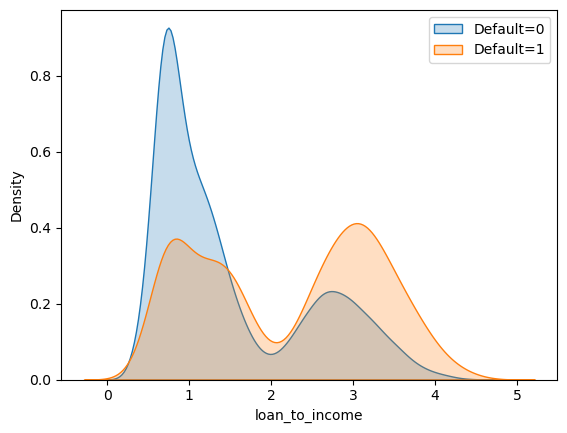

In [113]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'], fill= True,label='Default=0' )
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'], fill= True,label='Default=1')
plt.legend()
plt.show()

In [114]:
df_train_1[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [115]:
df_train_1['deliquency_ratio'] = (df_train_1['delinquent_months'] *100/df_train_1['total_loan_months']).round(1)
df_test['deliquency_ratio'] = (df_test['delinquent_months'] *100/df_test['total_loan_months']).round(1)
df_train_1[['delinquent_months','total_loan_months','deliquency_ratio']]

,delinquent_months,total_loan_months,deliquency_ratio
27434,6,90,6.70
13400,4,119,3.40
883,14,83,16.90
7303,0,37,0.00
45124,6,62,9.70
...,...,...,...
11284,23,129,17.80
44732,0,80,0.00
38158,0,8,0.00
860,5,130,3.80


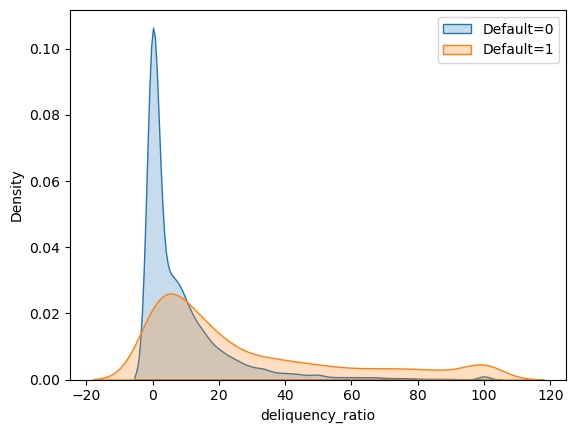

In [116]:
sns.kdeplot(df_train_1[df_train_1.default==0]['deliquency_ratio'], fill= True,label='Default=0' )
sns.kdeplot(df_train_1[df_train_1.default==1]['deliquency_ratio'], fill= True,label='Default=1')
plt.legend()
plt.show()

In [117]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'deliquency_ratio'],
      dtype='object')

In [118]:
df_train_1['avg_dpd_per_deliquency'] = np.where(
    df_train_1['delinquent_months'] !=0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),0
)
# doing it on test data set

df_test['avg_dpd_per_deliquency'] = np.where(
    df_test['delinquent_months'] !=0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),0
)

In [119]:
df_train_1['avg_dpd_per_deliquency'].isna().sum()

0

In [120]:
df_train_1['avg_dpd_per_deliquency'].describe()

count   37487.00
mean        3.29
std         2.90
min         0.00
25%         0.00
50%         4.30
75%         5.80
max        10.00
Name: avg_dpd_per_deliquency, dtype: float64

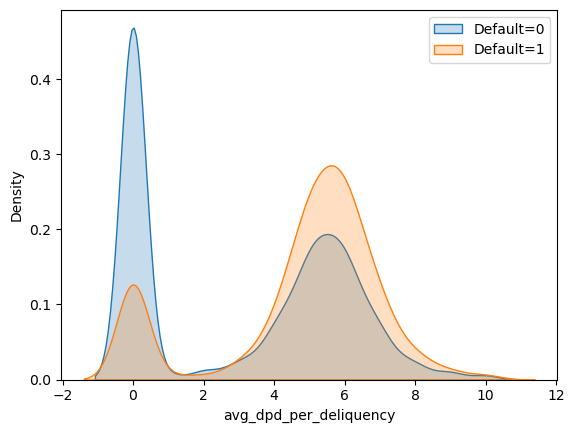

In [121]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_deliquency'], fill= True,label='Default=0' )
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_deliquency'], fill= True,label='Default=1')
plt.legend()
plt.show()

#### Feature Selection 

In [122]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis= 'columns')
df_test= df_test.drop(['cust_id','loan_id'],axis= 'columns')

In [123]:
df_train_1.columns


Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'deliquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [124]:
#dropping the columns which are not useful for the analysis
df_train_3=df_train_2.drop(['disbursal_date','installment_start_dt','loan_amount',
                             'income','total_loan_months','delinquent_months','total_dpd'],axis = 'columns')
df_test=df_test.drop(['disbursal_date','installment_start_dt','loan_amount',
                             'income','total_loan_months','delinquent_months','total_dpd'],axis = 'columns')

In [125]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'deliquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [126]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [127]:
X_train= df_train_3.drop('default', axis= 'columns')
y_train=df_train_3['default']

# scaling the columns 

In [128]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale =df_train_3.select_dtypes(['int64','float64']).columns
scaler = MinMaxScaler()
X_train[cols_to_scale]= scaler.fit_transform(X_train[cols_to_scale])
X_train.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency
27434,0.52,F,Single,Salaried,0.00,Owned,0.13,Ahmedabad,Gujarat,0.46,...,0.34,0.18,0.07,1.00,1.00,0.88,0.60,0.61,0.07,0.55
13400,0.21,M,Single,Salaried,0.00,Owned,0.80,Delhi,Delhi,0.00,...,0.51,0.20,0.12,0.67,0.50,0.38,0.93,0.18,0.03,0.42
883,0.62,F,Single,Self-Employed,0.00,Mortgage,0.93,Lucknow,Uttar Pradesh,0.20,...,0.25,0.27,0.10,0.33,0.50,0.38,0.84,0.08,0.17,0.56
7303,0.48,F,Single,Self-Employed,0.20,Owned,0.87,Bangalore,Karnataka,0.76,...,0.28,0.03,0.01,0.00,0.50,0.50,0.34,0.19,0.00,0.00
45124,0.25,F,Single,Salaried,0.00,Owned,0.87,Jaipur,Rajasthan,0.33,...,0.74,0.01,0.01,0.33,0.00,0.50,0.19,0.36,0.10,0.47


In [129]:
X_test= df_test.drop('default', axis= 'columns')
y_test=df_test['default']

X_test[cols_to_scale]= scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df= pd.DataFrame()
    vif_df['columns'] = data.columns
    vif_df['VIF']= [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [131]:
calculate_vif(X_train[cols_to_scale])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,columns,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [132]:
features_to_drop_vif = ['sanction_amount','principal_outstanding','net_disbursement','gst','processing_fee']

In [133]:
X_train_1 =X_train.drop(features_to_drop_vif, axis ='columns')
numeric_columns = X_train_1.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [134]:
#calculating vif again
vif_df= calculate_vif(X_train_1[numeric_columns])


In [135]:
# Accessing the 'columns' column from the DataFrame
selected_numeric_feature_vif = vif_df['columns'].values
print(selected_numeric_feature_vif)


['age' 'number_of_dependants' 'years_at_current_address' 'zipcode'
 'loan_tenure_months' 'bank_balance_at_application'
 'number_of_open_accounts' 'number_of_closed_accounts' 'enquiry_count'
 'credit_utilization_ratio' 'loan_to_income' 'deliquency_ratio'
 'avg_dpd_per_deliquency']


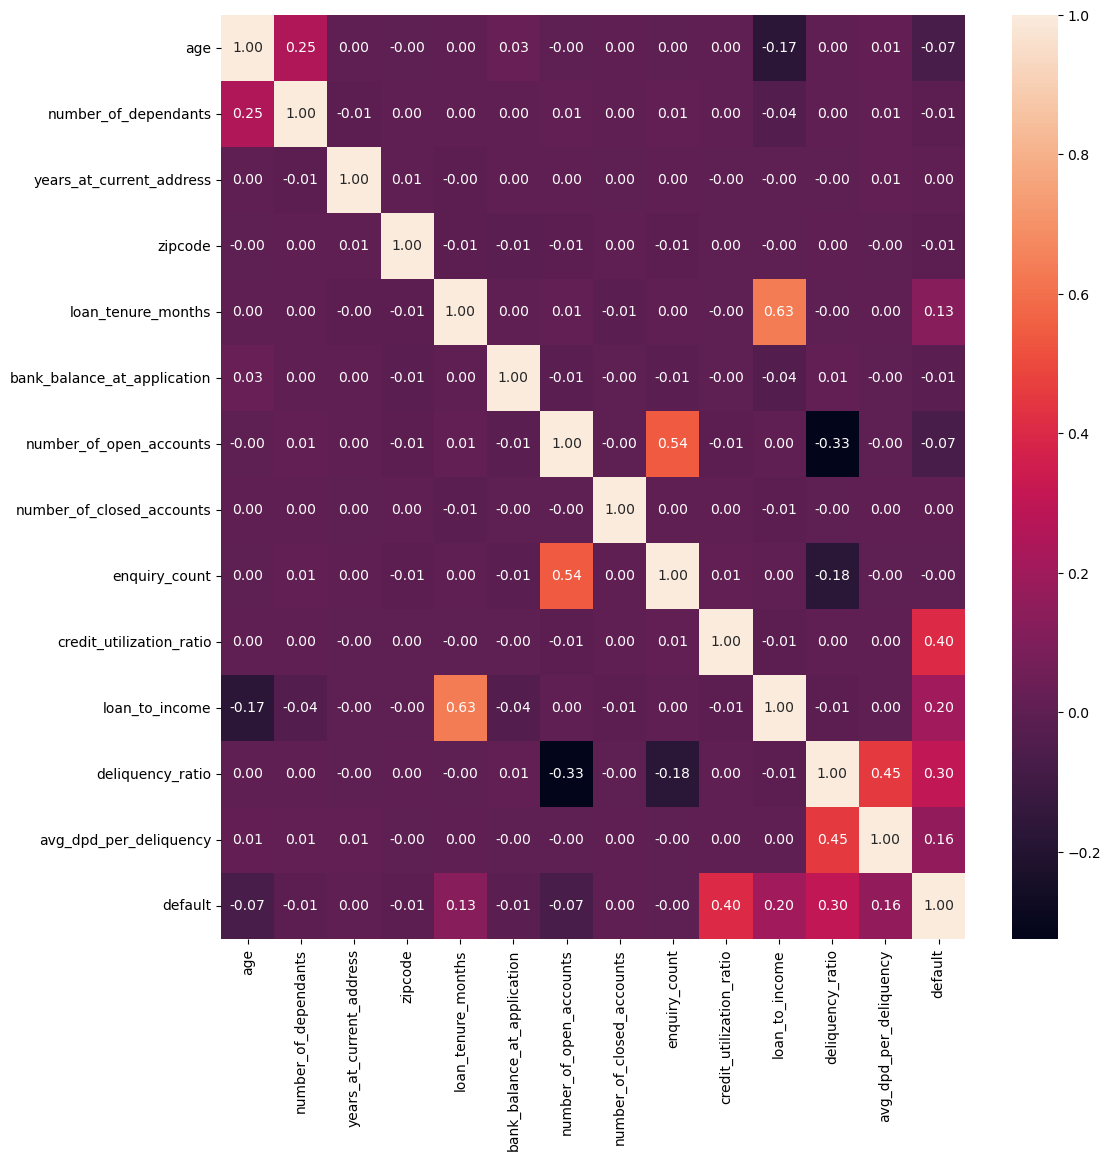

In [136]:
# Convert 'default' to an Index and append it to numeric_columns
numeric_columns = numeric_columns.append(pd.Index(['default']))

# Calculate the correlation matrix
cm = df_train_3[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.show()




In [137]:
columns_categorical

['gender',
 'loan_purpose',
 'loan_type',
 'default',
 'marital_status',
 'employment_status',
 'residence_type',
 'state',
 'zipcode']

In [138]:
temp= pd.concat([X_train_1, y_train],axis =1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


In [139]:
def calculate_woe_iv(df, feature, target):
    grouped=df.groupby(feature)[target].agg(['count','sum'])
    grouped=grouped.rename(columns={'count':'total','sum':'good'})
    grouped['bad']= grouped['total']-grouped['good']
    total_good = grouped['good'].sum()
    total_bad= grouped['bad'].sum()
    grouped['good_pct']=grouped['good']/total_good
    grouped['bad_pct']=grouped['bad']/total_bad
    grouped['woe'] =np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv']= (grouped['good_pct'] - grouped['bad_pct']) * grouped['woe']
    grouped['woe']=  grouped['woe'].replace([np.inf,-np.inf],0)
    grouped['iv']=  grouped['iv'].replace([np.inf,-np.inf],0)
    total_iv = grouped['iv'].sum()
    return grouped,total_iv
grouped,total_iv=calculate_woe_iv(pd.concat([X_train_1, y_train],axis =1), 'loan_purpose','default')
grouped,total_iv   

(              total  good    bad  good_pct  bad_pct   woe   iv
 loan_purpose                                                  
 Auto           7437   314   7123      0.10     0.21 -0.75 0.08
 Education      5626   546   5080      0.17     0.15  0.14 0.00
 Home          11271  1744   9527      0.55     0.28  0.68 0.18
 Personal      13153   585  12568      0.18     0.37 -0.69 0.13,
 0.39377543144164784)

In [140]:
total_iv

0.39377543144164784

In [141]:
pd.cut(X_train_1['loan_to_income'])

TypeError: cut() missing 1 required positional argument: 'bins'

In [143]:
iv_values = {}

# Loop through each feature in X_train_1
for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':  # Categorical feature
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), feature, 'default')
        iv_values[feature] = iv
    else:  # Continuous feature
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)  # Apply binning to continuous features
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
        iv_values[feature] = iv

iv_values  # This will give you the IV values for each feature


{'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.001042536380353028,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711978,
 'zipcode': 0.0007436024782513755,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'loan_tenure_months': 0.23450610202970526,
 'bank_balance_at_application': 0.004242001247914226,
 'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'loan_to_income': 0.4915664145044282,
 'deliquency_ratio': 0.678322540101926,
 'avg_dpd_per_deliquency': 0.4210029044696208}

In [144]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
iv_df= pd.DataFrame(list(iv_values.items()),columns=['feature','IV'])
iv_df= iv_df.sort_values(by='IV',ascending=False)
iv_df

,feature,IV
17,credit_utilization_ratio,2.423
19,deliquency_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_deliquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [145]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'deliquency_ratio',
 'avg_dpd_per_deliquency']

## feature Encoding

In [146]:
X_train_reduced = X_train[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [147]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency
27434,0.519,Owned,Home,Secured,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.509,0.667,0.929,0.183,0.034,0.420
883,0.615,Mortgage,Personal,Unsecured,0.245,0.333,0.838,0.084,0.169,0.560
7303,0.481,Owned,Auto,Secured,0.283,0.000,0.343,0.187,0.000,0.000
45124,0.250,Owned,Education,Secured,0.736,0.333,0.192,0.361,0.097,0.470


In [148]:
X_train_encoded = pd.get_dummies(X_train_reduced , drop_first = True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first = True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.084,0.169,0.560,False,False,False,False,True,True


# Model Training 

# Attempt 1
## 1.Logistic Regression 
## 2.No handling of class imbalnce 

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [150]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [151]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.73      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Model
model = LogisticRegression()

# Parameter Grid
param_dict = [
    {'penalty': ['l1', 'l2'], 
     'C': np.logspace(-4, 4, 20), 
     'solver': ['liblinear'], 
     'max_iter': [100, 200, 300]},

    {'penalty': ['elasticnet'], 
     'C': np.logspace(-4, 4, 20), 
     'solver': ['saga'], 
     'max_iter': [100, 200, 300], 
     'l1_ratio': np.linspace(0, 1, 10)}
]

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dict,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_encoded, y_train)

# Best Parameters
print("🚨 Best Parameters:", random_search.best_params_)

# Predictions
y_pred = random_search.best_estimator_.predict(X_test_encoded)

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
🚨 Best Parameters: {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 200, 'l1_ratio': 0.5555555555555556, 'C': 10000.0}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [153]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define parameter grid
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),  # Log scale for learning_rate
    'n_estimators': [100, 150, 200,250,300],
    'max_depth': [3, 4,5, 6,7,8, 9,10],
    'subsample': [0.6,0.7, 0.8,0.9, 1.0],
    'colsample_bytree': [0.6,0.7, 0.8, 0.9,1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist,scoring='f1',
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model to training data
random_search.fit(X_train_encoded, y_train)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Predict with the best model
y_pred = best_xgb_model.predict(X_test_encoded)

# Print classification report
print(classification_report(y_test, y_pred))

# Print best hyperparameters found by RandomizedSearchCV
print(f"Best hyperparameters: {random_search.best_params_}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.73      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498

Best hyperparameters: {'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.9}


# Attempt 2
## Logistic Regression & XGB
## Handle class imbalance using under sampling

In [154]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus =rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train_rus,y_train_rus)
y_pred = model.predict(X_test_encoded)
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [156]:
from xgboost import XGBClassifier
model = XGBClassifier(**random_search.best_params_)

model.fit(X_train_rus,y_train_rus)
y_pred = model.predict(X_test_encoded)
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.96     11390
           1       0.59      0.96      0.73      1108

    accuracy                           0.94     12498
   macro avg       0.79      0.95      0.85     12498
weighted avg       0.96      0.94      0.94     12498



# Attempt 3 
## 1Logistic Regression 
## handling imbalance using SMOTE Tomek 
## Parameter tunning using optuna

In [157]:
from imblearn.combine import SMOTETomek
smt =SMOTETomek(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test_encoded)
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [159]:
import optuna
print(optuna.__version__)



4.2.1


In [160]:
import optuna
print(optuna.__version__)



4.2.1


In [164]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

def objective(trial):
    C = 1
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    model = LogisticRegression(C=C, solver=solver, max_iter=1000)
    scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    accuracy = np.mean(scores)
    return accuracy

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=10)

# Print the best parameters
print("Best parameters:", study.best_params)
print('Best score validation accuracy:', study.best_value)

[I 2025-03-11 12:35:58,937] A new study created in memory with name: no-name-02a67225-e258-44e6-8e36-9e74d8e55553
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-03-11 12:35:58,975] Trial 0 finished with value: 0.9733333333333333 and parameters: {'solver': 'sag'}. Best is trial 0 with value: 0.9733333333333333.
[I 2025-03-11 12:35:59,005] Trial 1 finished with value: 0.9733333333333333 and parameters: {'solver': 'lbfgs'}. Best is trial 0 with value: 0.9733333333333333.
C:\ProgramData\anaconda3\Lib\sit

Best parameters: {'solver': 'saga'}
Best score validation accuracy: 0.98


In [165]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.98
  Params: 
    solver: saga
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [167]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)


[I 2025-03-11 12:37:00,708] A new study created in memory with name: no-name-afa2213a-1596-4227-a90f-085549ac16b7
[I 2025-03-11 12:37:03,698] Trial 0 finished with value: 0.9574861267764483 and parameters: {'lambda': 0.07955025019642867, 'alpha': 0.0014405600934313603, 'subsample': 0.7584533689479276, 'colsample_bytree': 0.9685279066804036, 'max_depth': 9, 'eta': 0.04506556433053976, 'gamma': 7.842625035690336, 'scale_pos_weight': 9.515561617445595, 'min_child_weight': 7, 'max_delta_step': 4}. Best is trial 0 with value: 0.9574861267764483.
[I 2025-03-11 12:37:04,992] Trial 1 finished with value: 0.969285479843991 and parameters: {'lambda': 0.02324691318290609, 'alpha': 0.42139811941555244, 'subsample': 0.5809712440799342, 'colsample_bytree': 0.834377318577415, 'max_depth': 9, 'eta': 0.26665289490846694, 'gamma': 6.663685815125053, 'scale_pos_weight': 3.464175470081377, 'min_child_weight': 2, 'max_delta_step': 5}. Best is trial 1 with value: 0.969285479843991.
[I 2025-03-11 12:37:06,24

In [169]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9759464153902848
  Params: 
    lambda: 0.0013648186748974234
    alpha: 0.015351747020241557
    subsample: 0.996616446768347
    colsample_bytree: 0.429348236140234
    max_depth: 10
    eta: 0.2220080984668008
    gamma: 0.5929869630449066
    scale_pos_weight: 1.0217983707387315
    min_child_weight: 10
    max_delta_step: 9
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.76      0.80      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.87      0.89      0.88     12498
weighted avg       0.96      0.96      0.96     12498



## Model Evaluation : ROC/AUC

In [171]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [172]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.       , 0.       , 0.       , 0.0000878, 0.0000878]),
 array([0.        , 0.00090253, 0.20758123, 0.20758123, 0.24277978]),
 array([       inf, 0.99999985, 0.99829705, 0.99829541, 0.99747338]))

In [173]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9830220314862299

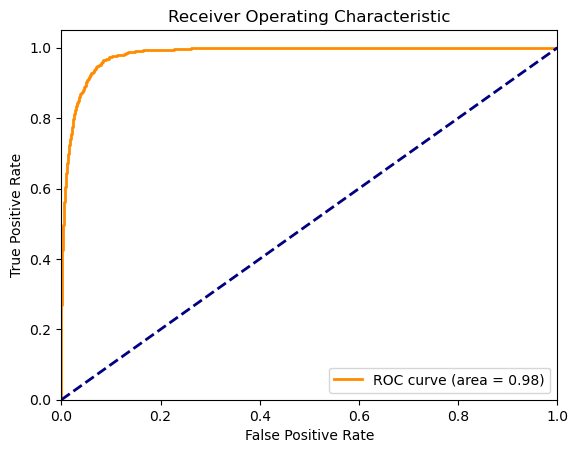

In [174]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [188]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.749
199,0,0.156


In [189]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.749,8
199,0,0.156,7


In [190]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.501
std        0.177
min        0.226
25%        0.344
50%        0.488
75%        0.661
max        0.813
Name: Default Probability, dtype: float64

In [191]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\saira\AppData\Local\Temp\ipykernel_11380\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.007,1.000,1249.000
6,6,0.007,0.040,4.000,1245.000
7,7,0.040,0.226,17.000,1233.000
8,8,0.226,0.813,168.000,1082.000
9,9,0.814,1.000,918.000,332.000


In [192]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.007,1.000,1249.000,0.080,99.920
6,6,0.007,0.040,4.000,1245.000,0.320,99.680
7,7,0.040,0.226,17.000,1233.000,1.360,98.640
8,8,0.226,0.813,168.000,1082.000,13.440,86.560
9,9,0.814,1.000,918.000,332.000,73.440,26.560


In [193]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.814,1.000,918.000,332.000,73.440,26.560
1,8,0.226,0.813,168.000,1082.000,13.440,86.560
2,7,0.040,0.226,17.000,1233.000,1.360,98.640
3,6,0.007,0.040,4.000,1245.000,0.320,99.680
4,5,0.001,0.007,1.000,1249.000,0.080,99.920
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [194]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.814,1.000,918.000,332.000,73.440,26.560,918.000,332.000
1,8,0.226,0.813,168.000,1082.000,13.440,86.560,1086.000,1414.000
2,7,0.040,0.226,17.000,1233.000,1.360,98.640,1103.000,2647.000
3,6,0.007,0.040,4.000,1245.000,0.320,99.680,1107.000,3892.000
4,5,0.001,0.007,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [195]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.814,1.000,918.000,332.000,73.440,26.560,918.000,332.000,82.852,2.915
1,8,0.226,0.813,168.000,1082.000,13.440,86.560,1086.000,1414.000,98.014,12.414
2,7,0.040,0.226,17.000,1233.000,1.360,98.640,1103.000,2647.000,99.549,23.240
3,6,0.007,0.040,4.000,1245.000,0.320,99.680,1107.000,3892.000,99.910,34.170
4,5,0.001,0.007,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [196]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.814,1.000,918.000,332.000,73.440,26.560,918.000,332.000,82.852,2.915,79.937
1,8,0.226,0.813,168.000,1082.000,13.440,86.560,1086.000,1414.000,98.014,12.414,85.600
2,7,0.040,0.226,17.000,1233.000,1.360,98.640,1103.000,2647.000,99.549,23.240,76.309
3,6,0.007,0.040,4.000,1245.000,0.320,99.680,1107.000,3892.000,99.910,34.170,65.739
4,5,0.001,0.007,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [200]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9830220314862299
Gini Coefficient: 0.9660440629724598


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

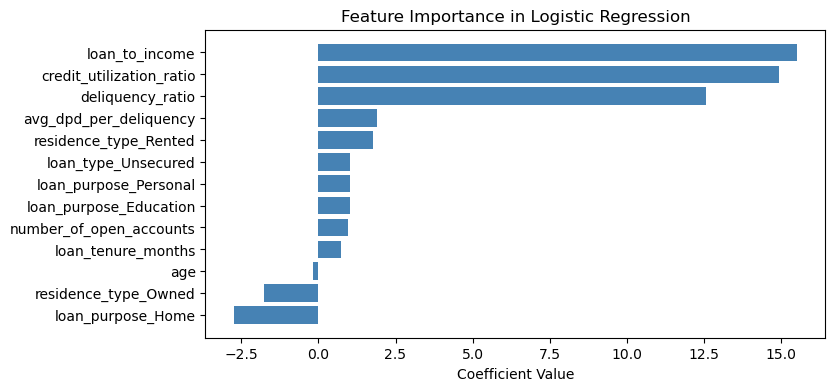

In [201]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [202]:
X_test_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.689,0.000,0.000,True,False,False,True,False,False
199,0.192,0.623,1.000,0.727,0.635,0.000,0.000,True,False,False,True,False,False
12447,0.192,0.189,0.667,0.909,0.187,0.000,0.000,False,True,False,False,False,False
39489,0.654,0.377,1.000,0.535,0.169,0.132,0.520,True,False,False,False,False,False


In [197]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [198]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [199]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [204]:
import os

# Create the directory if it doesn't exist
os.makedirs('artifacts', exist_ok=True)

# Now dump the model data
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(model_data, 'artifacts/model_data.joblib')


['artifacts/model_data.joblib']